### __Part 1 - Data Collection__

I am using chembl library to download the biological activity data from chembl database

In [26]:
! pip install chembl_webresource_client


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip


### Importing Libraries

In [27]:
# Import necessary libraries
import pandas as pd
from chembl_webresource_client.new_client import new_client

### Search for Target Protein

Target Protein: Cystic Fibrosis Transmembrane Conductance Regulator (CFTR)

Function: Chloride channel protein that helps regulate salt and water balance in tissues.

Disease Association: Mutations in CFTR cause cystic fibrosis, leading to severe respiratory and digestive problems.


In [28]:
target=new_client.target    
target_query = target.search('CFTR')
targets = pd.DataFrame.from_dict(target_query)
targets

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,"[{'xref_id': 'P13569', 'xref_name': None, 'xre...",Homo sapiens,Cystic fibrosis transmembrane conductance regu...,17.0,False,CHEMBL4051,"[{'accession': 'P13569', 'component_descriptio...",SINGLE PROTEIN,9606
1,"[{'xref_id': 'P34158', 'xref_name': None, 'xre...",Rattus norvegicus,Cystic fibrosis transmembrane conductance regu...,17.0,False,CHEMBL3992,"[{'accession': 'P34158', 'component_descriptio...",SINGLE PROTEIN,10116
2,[],Homo sapiens,Cystic fibrosis transmembrane conductance regu...,16.0,False,CHEMBL3885559,"[{'accession': 'P13569', 'component_descriptio...",PROTEIN-PROTEIN INTERACTION,9606
3,[],Cricetulus griseus,Cystic fibrosis transmembrane conductance regu...,13.0,False,CHEMBL3988611,"[{'accession': 'G3H9J3', 'component_descriptio...",SINGLE PROTEIN,10029
4,"[{'xref_id': 'Q9HD26', 'xref_name': None, 'xre...",Homo sapiens,Golgi-associated PDZ and coiled-coil motif-con...,12.0,False,CHEMBL1741218,"[{'accession': 'Q9HD26', 'component_descriptio...",SINGLE PROTEIN,9606


#### Select and retrieve data for bioactivity data for Epoxide hydrolase 2 (2nd entry)

I am assigning the second entry (0-indexed) (which corresponds to the epoxide hydrolase 2) to the selected target variable

In [29]:
selected_target = targets.target_chembl_id[0]
selected_target

'CHEMBL4051'

In [30]:
activity = new_client.activity
res = activity.filter(target_chembl_id=selected_target).filter(standard_type="IC50") 



choosing a particular standard type "IC50" or "EC50" makes the data uniform as it ensures that there is no mixture of different 
bioactivity units, number in the value column represents the potency so lower the number, the better is the potency of the drug,
 as value represents the concentration of drug represents the conecentration o required to inhibit the protein

In [31]:
df=pd.DataFrame.from_dict(res)
df

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,2077278,[],CHEMBL944926,Binding affinity to GST tagged human CFTR PDZ2...,B,None,None,BAO_0000190,...,Homo sapiens,Cystic fibrosis transmembrane conductance regu...,9606,None,None,IC50,uM,UO_0000065,None,160.0
1,None,None,2077283,[],CHEMBL944926,Binding affinity to GST tagged human CFTR PDZ2...,B,None,None,BAO_0000190,...,Homo sapiens,Cystic fibrosis transmembrane conductance regu...,9606,None,None,IC50,uM,UO_0000065,None,170.0
2,None,None,2077284,[],CHEMBL944926,Binding affinity to GST tagged human CFTR PDZ2...,B,None,None,BAO_0000190,...,Homo sapiens,Cystic fibrosis transmembrane conductance regu...,9606,None,None,IC50,uM,UO_0000065,None,380.0
3,None,None,2077285,[],CHEMBL944926,Binding affinity to GST tagged human CFTR PDZ2...,B,None,None,BAO_0000190,...,Homo sapiens,Cystic fibrosis transmembrane conductance regu...,9606,None,None,IC50,uM,UO_0000065,None,490.0
4,None,None,2077286,[],CHEMBL944926,Binding affinity to GST tagged human CFTR PDZ2...,B,None,None,BAO_0000190,...,Homo sapiens,Cystic fibrosis transmembrane conductance regu...,9606,None,None,IC50,uM,UO_0000065,None,330.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,None,None,15008318,[],CHEMBL3368026,Correction of defective trafficking of human d...,B,None,None,BAO_0000190,...,Homo sapiens,Cystic fibrosis transmembrane conductance regu...,9606,None,None,IC50,uM,UO_0000065,None,6.0
143,None,None,18674243,[],CHEMBL4235255,Inhibition of CFTR-mediated forskolin-induced ...,B,None,None,BAO_0000190,...,Homo sapiens,Cystic fibrosis transmembrane conductance regu...,9606,None,None,IC50,uM,UO_0000065,None,58.62
144,None,None,19098860,[],CHEMBL4368070,Corrector activity at human CFTR F508del mutan...,B,P13569,F508del,BAO_0000190,...,Homo sapiens,Cystic fibrosis transmembrane conductance regu...,9606,None,None,IC50,uM,UO_0000065,None,3.9
145,None,None,19098861,[],CHEMBL4368070,Corrector activity at human CFTR F508del mutan...,B,P13569,F508del,BAO_0000190,...,Homo sapiens,Cystic fibrosis transmembrane conductance regu...,9606,None,None,IC50,uM,UO_0000065,None,3.9


I am saving the resulting bioactivity data to a CSV file bioactivity_data.csv

In [32]:
df.to_csv('../../datasets/CFTR/bioactivity_data_CFTR.csv',index=False)

### Handling missing data

If any compound has missing value for the value column, then drop it

In [33]:
df2= df.dropna(subset=['canonical_smiles', 'standard_value'])
df2= df2.reset_index(drop=True)
# Convert column to numeric, forcing errors to NaN
df2['standard_value'] = pd.to_numeric(df2['standard_value'], errors='coerce')
df2=df2[df2['standard_value']>0]
df2= df2.reset_index(drop=True)
df2

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,2077278,[],CHEMBL944926,Binding affinity to GST tagged human CFTR PDZ2...,B,None,None,BAO_0000190,...,Homo sapiens,Cystic fibrosis transmembrane conductance regu...,9606,None,None,IC50,uM,UO_0000065,None,160.0
1,None,None,2077283,[],CHEMBL944926,Binding affinity to GST tagged human CFTR PDZ2...,B,None,None,BAO_0000190,...,Homo sapiens,Cystic fibrosis transmembrane conductance regu...,9606,None,None,IC50,uM,UO_0000065,None,170.0
2,None,None,2077284,[],CHEMBL944926,Binding affinity to GST tagged human CFTR PDZ2...,B,None,None,BAO_0000190,...,Homo sapiens,Cystic fibrosis transmembrane conductance regu...,9606,None,None,IC50,uM,UO_0000065,None,380.0
3,None,None,2077285,[],CHEMBL944926,Binding affinity to GST tagged human CFTR PDZ2...,B,None,None,BAO_0000190,...,Homo sapiens,Cystic fibrosis transmembrane conductance regu...,9606,None,None,IC50,uM,UO_0000065,None,490.0
4,None,None,2077286,[],CHEMBL944926,Binding affinity to GST tagged human CFTR PDZ2...,B,None,None,BAO_0000190,...,Homo sapiens,Cystic fibrosis transmembrane conductance regu...,9606,None,None,IC50,uM,UO_0000065,None,330.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,None,None,15008318,[],CHEMBL3368026,Correction of defective trafficking of human d...,B,None,None,BAO_0000190,...,Homo sapiens,Cystic fibrosis transmembrane conductance regu...,9606,None,None,IC50,uM,UO_0000065,None,6.0
137,None,None,18674243,[],CHEMBL4235255,Inhibition of CFTR-mediated forskolin-induced ...,B,None,None,BAO_0000190,...,Homo sapiens,Cystic fibrosis transmembrane conductance regu...,9606,None,None,IC50,uM,UO_0000065,None,58.62
138,None,None,19098860,[],CHEMBL4368070,Corrector activity at human CFTR F508del mutan...,B,P13569,F508del,BAO_0000190,...,Homo sapiens,Cystic fibrosis transmembrane conductance regu...,9606,None,None,IC50,uM,UO_0000065,None,3.9
139,None,None,19098861,[],CHEMBL4368070,Corrector activity at human CFTR F508del mutan...,B,P13569,F508del,BAO_0000190,...,Homo sapiens,Cystic fibrosis transmembrane conductance regu...,9606,None,None,IC50,uM,UO_0000065,None,3.9


So in the above dataset, 22 rows had missing data, which is now removed

### Data pre-processing of the bioactivity data

__Labeling compounds as either being active, inactive or intermediate__ 

The bioactivity data is in the IC50 unit. Compounds having values of less than 1000 nM will be considered to be __active__, while
those greater than 10,000 nM, will be considered to be __inactive__. As for those values in between 1,000 and 10,000 nM will be referred as __intermediate__

In [34]:
bioactivity_class = []
for i in df2.standard_value:
    if float(i) >= 10000:
        bioactivity_class.append("inactive")
    elif float(i) <= 1000 : 
        bioactivity_class.append("active")
    else :
        bioactivity_class.append("intermediate")

 Iterate the molecule_chembl_id,canonical_smiles and standard_value columns from df to a another dataframe

In [35]:
selection = ['molecule_chembl_id','canonical_smiles','standard_value']
df3 = df2[selection]

In [36]:
df3

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL403296,CCCCC(O)c1[nH]c2cc(C)c(C(=O)O)cc2c1CCc1ccccc1,160000.0
1,CHEMBL403297,Cc1cc2c(CO)c(CCCCC(=O)O)n(CCc3ccccc3)c2cc1C(=O)O,170000.0
2,CHEMBL250740,CCCCCc1c(CO)c2cc(C)c(C(=O)O)cc2n1CCc1ccccc1,380000.0
3,CHEMBL252273,Cc1cc2[nH]c(C(=O)NCCC(=O)O)c(CCc3ccccc3)c2cc1C...,490000.0
4,CHEMBL252077,Cc1cc2[nH]c(C(O)CCCC(=O)O)c(CCc3ccccc3)c2cc1C(...,330000.0
...,...,...,...
136,CHEMBL260775,COc1ccc(Cl)cc1Nc1nc(-c2sc(NC(=O)c3ccccc3)nc2C)cs1,6000.0
137,CHEMBL4243267,CCCCCCCCC[C@@H]1C[C@H](O)[C@H]2C[N@]1O[C@@H]2c...,58620.0
138,CHEMBL1433758,Cc1cccc(Nc2ncnc3onc(-c4ccc(F)cc4)c23)c1C,3900.0
139,CHEMBL1316007,Cc1cccc(Nc2ncnc3onc(-c4ccc(Cl)cc4)c23)c1C,3900.0


In [37]:
df4=pd.concat([df3,pd.Series(bioactivity_class)],axis=1)


#### Saves dataframe to a CSV file

In [38]:
df4.to_csv('../../datasets/CFTR/bioactivity_preprocessed_data_CFTR.csv',index=False)

### __Part 2- Exploratory Data Analysis__

### __Installing Conda and RDKit__


In [39]:
! pip install rdkit


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [40]:
import pandas as pd
df = pd.read_csv('../../datasets/CFTR/bioactivity_preprocessed_data_CFTR.csv')
df = df.rename(columns={'0': 'class'})
df

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL403296,CCCCC(O)c1[nH]c2cc(C)c(C(=O)O)cc2c1CCc1ccccc1,160000.0,inactive
1,CHEMBL403297,Cc1cc2c(CO)c(CCCCC(=O)O)n(CCc3ccccc3)c2cc1C(=O)O,170000.0,inactive
2,CHEMBL250740,CCCCCc1c(CO)c2cc(C)c(C(=O)O)cc2n1CCc1ccccc1,380000.0,inactive
3,CHEMBL252273,Cc1cc2[nH]c(C(=O)NCCC(=O)O)c(CCc3ccccc3)c2cc1C...,490000.0,inactive
4,CHEMBL252077,Cc1cc2[nH]c(C(O)CCCC(=O)O)c(CCc3ccccc3)c2cc1C(...,330000.0,inactive
...,...,...,...,...
136,CHEMBL260775,COc1ccc(Cl)cc1Nc1nc(-c2sc(NC(=O)c3ccccc3)nc2C)cs1,6000.0,intermediate
137,CHEMBL4243267,CCCCCCCCC[C@@H]1C[C@H](O)[C@H]2C[N@]1O[C@@H]2c...,58620.0,inactive
138,CHEMBL1433758,Cc1cccc(Nc2ncnc3onc(-c4ccc(F)cc4)c23)c1C,3900.0,intermediate
139,CHEMBL1316007,Cc1cccc(Nc2ncnc3onc(-c4ccc(Cl)cc4)c23)c1C,3900.0,intermediate


### __Calculate Lipinski Descriptors__

Christopher Lipinski, a scientist at Pfizer, came up with a set of rule-of-thumb for evaluating the **druglikeness** of compounds. Such druglikeness is based on the Absorption, Distribution, Metabolism and Excretion (ADME) that is also known as the pharmacokinetic profile. Lipinski analyzed all orally active FDA-approved drugs in the formulation of what is to be known as the **Rule-of-Five** or **Lipinski's Rule**.

Lipinski's rule of five is a rule of thumb to evaluate druglikeness or determine if a chemical compound with a certain pharmacological or biological activity has chemical properties and physical properties that would make it a likely orally active drug in humans. 

The Lipinski's Rule stated the following:
* Molecular weight < 500 Dalton
* Octanol-water partition coefficient (LogP) < 5
* Hydrogen bond donors < 5
* Hydrogen bond acceptors < 10 

An orally active drug has no more than one violation of the above 5 conditions according to Lipinski's Rule.

(all of the values are multiples of 5 above)

Importing Libraries

In [41]:
! pip install py3Dmol


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [42]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors,Lipinski,AllChem
import py3Dmol
import re
from rdkit.Chem import Draw
from rdkit.Chem import AllChem

### __Calculate Descriptors__

In [43]:
def lipinski(smiles, verbose=False):
    # Ensure smiles is a pandas Series
    if not isinstance(smiles, pd.Series):
        raise TypeError("Input should be a pandas Series")
    
    moldata = []
    
    # Convert the first SMILES string to an RDKit molecule

    for elem in smiles:
        first_smiles = elem
        molecule = Chem.MolFromSmiles(first_smiles)
        if not molecule:
            continue
        moldata.append(molecule)
    
    baseData = []  # Initialize baseData as an empty list
    
    for mol in moldata:        
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
        
        row = np.array([desc_MolWt, desc_MolLogP, desc_NumHDonors, desc_NumHAcceptors])
        baseData.append(row)  # Append each row to baseData
    
    columnNames = ["MW", "LogP", "NumHDonors", "NumHAcceptors"]
    
    # Convert baseData to a numpy array and then to a DataFrame
    baseData = np.array(baseData)
    descriptors = pd.DataFrame(baseData, columns=columnNames)
    
    return descriptors

# Example usage
smiles_series = pd.Series(["CCO"])
descriptors = lipinski(smiles_series, verbose=True)


In [44]:
df_lipinski=lipinski(pd.Series(df["canonical_smiles"]))

In [45]:
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,365.473,5.18332,3.0,2.0
1,409.482,4.18032,3.0,4.0
2,379.500,5.11562,2.0,3.0
3,394.427,3.16422,4.0,3.0
4,395.455,4.24802,4.0,3.0
...,...,...,...,...
136,456.980,6.23292,2.0,7.0
137,331.500,4.86500,1.0,3.0
138,334.354,4.78434,1.0,5.0
139,350.809,5.29864,1.0,5.0


In [46]:
df

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL403296,CCCCC(O)c1[nH]c2cc(C)c(C(=O)O)cc2c1CCc1ccccc1,160000.0,inactive
1,CHEMBL403297,Cc1cc2c(CO)c(CCCCC(=O)O)n(CCc3ccccc3)c2cc1C(=O)O,170000.0,inactive
2,CHEMBL250740,CCCCCc1c(CO)c2cc(C)c(C(=O)O)cc2n1CCc1ccccc1,380000.0,inactive
3,CHEMBL252273,Cc1cc2[nH]c(C(=O)NCCC(=O)O)c(CCc3ccccc3)c2cc1C...,490000.0,inactive
4,CHEMBL252077,Cc1cc2[nH]c(C(O)CCCC(=O)O)c(CCc3ccccc3)c2cc1C(...,330000.0,inactive
...,...,...,...,...
136,CHEMBL260775,COc1ccc(Cl)cc1Nc1nc(-c2sc(NC(=O)c3ccccc3)nc2C)cs1,6000.0,intermediate
137,CHEMBL4243267,CCCCCCCCC[C@@H]1C[C@H](O)[C@H]2C[N@]1O[C@@H]2c...,58620.0,inactive
138,CHEMBL1433758,Cc1cccc(Nc2ncnc3onc(-c4ccc(F)cc4)c23)c1C,3900.0,intermediate
139,CHEMBL1316007,Cc1cccc(Nc2ncnc3onc(-c4ccc(Cl)cc4)c23)c1C,3900.0,intermediate


### **Combine DataFrames**

Let's combine the 2 DataFrames df and dp_lipinski

In [47]:
df_combined = pd.concat([df,df_lipinski], axis=1)

In [48]:
df_combined

,molecule_chembl_id,canonical_smiles,standard_value,class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL403296,CCCCC(O)c1[nH]c2cc(C)c(C(=O)O)cc2c1CCc1ccccc1,160000.0,inactive,365.473,5.18332,3.0,2.0
1,CHEMBL403297,Cc1cc2c(CO)c(CCCCC(=O)O)n(CCc3ccccc3)c2cc1C(=O)O,170000.0,inactive,409.482,4.18032,3.0,4.0
2,CHEMBL250740,CCCCCc1c(CO)c2cc(C)c(C(=O)O)cc2n1CCc1ccccc1,380000.0,inactive,379.500,5.11562,2.0,3.0
3,CHEMBL252273,Cc1cc2[nH]c(C(=O)NCCC(=O)O)c(CCc3ccccc3)c2cc1C...,490000.0,inactive,394.427,3.16422,4.0,3.0
4,CHEMBL252077,Cc1cc2[nH]c(C(O)CCCC(=O)O)c(CCc3ccccc3)c2cc1C(...,330000.0,inactive,395.455,4.24802,4.0,3.0
...,...,...,...,...,...,...,...,...
136,CHEMBL260775,COc1ccc(Cl)cc1Nc1nc(-c2sc(NC(=O)c3ccccc3)nc2C)cs1,6000.0,intermediate,456.980,6.23292,2.0,7.0
137,CHEMBL4243267,CCCCCCCCC[C@@H]1C[C@H](O)[C@H]2C[N@]1O[C@@H]2c...,58620.0,inactive,331.500,4.86500,1.0,3.0
138,CHEMBL1433758,Cc1cccc(Nc2ncnc3onc(-c4ccc(F)cc4)c23)c1C,3900.0,intermediate,334.354,4.78434,1.0,5.0
139,CHEMBL1316007,Cc1cccc(Nc2ncnc3onc(-c4ccc(Cl)cc4)c23)c1C,3900.0,intermediate,350.809,5.29864,1.0,5.0


### **Convert IC50 to pIC50**
To allow **IC50** data to be more uniformly distributed, we will convert **IC50** to the negative logarithmic scale which is essentially **-log10(IC50)**.

This custom function pIC50() will accept a DataFrame as input and will:
* Take the IC50 values from the ``standard_value`` column and converts it from nM to M by multiplying the value by 10$^{-9}$
* Take the molar value and apply -log10
* Delete the ``standard_value`` column and create a new ``pIC50`` column

In [49]:
# https://github.com/chaninlab/estrogen-receptor-alpha-qsar/blob/master/02_ER_alpha_RO5.ipynb

import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50

        
    return input

Point to note: Values greater than 100,000,000 will be fixed at 100,000,000 otherwise the negative logarithmic value will become negative.

In [50]:
df_combined.standard_value.describe()

count       141.000000
mean      18403.460993
std       61590.499864
min           4.000000
25%         700.000000
50%        3000.000000
75%       11000.000000
max      490000.000000
Name: standard_value, dtype: float64

We will first apply the norm_value() function so that the values in the standard_value column is normalized.

In [51]:
df_norm = df_combined[df['standard_value'] <= 100000000]
df_norm

,molecule_chembl_id,canonical_smiles,standard_value,class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL403296,CCCCC(O)c1[nH]c2cc(C)c(C(=O)O)cc2c1CCc1ccccc1,160000.0,inactive,365.473,5.18332,3.0,2.0
1,CHEMBL403297,Cc1cc2c(CO)c(CCCCC(=O)O)n(CCc3ccccc3)c2cc1C(=O)O,170000.0,inactive,409.482,4.18032,3.0,4.0
2,CHEMBL250740,CCCCCc1c(CO)c2cc(C)c(C(=O)O)cc2n1CCc1ccccc1,380000.0,inactive,379.500,5.11562,2.0,3.0
3,CHEMBL252273,Cc1cc2[nH]c(C(=O)NCCC(=O)O)c(CCc3ccccc3)c2cc1C...,490000.0,inactive,394.427,3.16422,4.0,3.0
4,CHEMBL252077,Cc1cc2[nH]c(C(O)CCCC(=O)O)c(CCc3ccccc3)c2cc1C(...,330000.0,inactive,395.455,4.24802,4.0,3.0
...,...,...,...,...,...,...,...,...
136,CHEMBL260775,COc1ccc(Cl)cc1Nc1nc(-c2sc(NC(=O)c3ccccc3)nc2C)cs1,6000.0,intermediate,456.980,6.23292,2.0,7.0
137,CHEMBL4243267,CCCCCCCCC[C@@H]1C[C@H](O)[C@H]2C[N@]1O[C@@H]2c...,58620.0,inactive,331.500,4.86500,1.0,3.0
138,CHEMBL1433758,Cc1cccc(Nc2ncnc3onc(-c4ccc(F)cc4)c23)c1C,3900.0,intermediate,334.354,4.78434,1.0,5.0
139,CHEMBL1316007,Cc1cccc(Nc2ncnc3onc(-c4ccc(Cl)cc4)c23)c1C,3900.0,intermediate,350.809,5.29864,1.0,5.0


In [52]:
df_norm.standard_value.describe()

count       141.000000
mean      18403.460993
std       61590.499864
min           4.000000
25%         700.000000
50%        3000.000000
75%       11000.000000
max      490000.000000
Name: standard_value, dtype: float64

In [53]:
df_final = pIC50(df_norm)
df_final

,molecule_chembl_id,canonical_smiles,standard_value,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL403296,CCCCC(O)c1[nH]c2cc(C)c(C(=O)O)cc2c1CCc1ccccc1,160000.0,inactive,365.473,5.18332,3.0,2.0,3.795880
1,CHEMBL403297,Cc1cc2c(CO)c(CCCCC(=O)O)n(CCc3ccccc3)c2cc1C(=O)O,170000.0,inactive,409.482,4.18032,3.0,4.0,3.769551
2,CHEMBL250740,CCCCCc1c(CO)c2cc(C)c(C(=O)O)cc2n1CCc1ccccc1,380000.0,inactive,379.500,5.11562,2.0,3.0,3.420216
3,CHEMBL252273,Cc1cc2[nH]c(C(=O)NCCC(=O)O)c(CCc3ccccc3)c2cc1C...,490000.0,inactive,394.427,3.16422,4.0,3.0,3.309804
4,CHEMBL252077,Cc1cc2[nH]c(C(O)CCCC(=O)O)c(CCc3ccccc3)c2cc1C(...,330000.0,inactive,395.455,4.24802,4.0,3.0,3.481486
...,...,...,...,...,...,...,...,...,...
136,CHEMBL260775,COc1ccc(Cl)cc1Nc1nc(-c2sc(NC(=O)c3ccccc3)nc2C)cs1,6000.0,intermediate,456.980,6.23292,2.0,7.0,5.221849
137,CHEMBL4243267,CCCCCCCCC[C@@H]1C[C@H](O)[C@H]2C[N@]1O[C@@H]2c...,58620.0,inactive,331.500,4.86500,1.0,3.0,4.231954
138,CHEMBL1433758,Cc1cccc(Nc2ncnc3onc(-c4ccc(F)cc4)c23)c1C,3900.0,intermediate,334.354,4.78434,1.0,5.0,5.408935
139,CHEMBL1316007,Cc1cccc(Nc2ncnc3onc(-c4ccc(Cl)cc4)c23)c1C,3900.0,intermediate,350.809,5.29864,1.0,5.0,5.408935


In [54]:
df_final.pIC50.describe()

count    141.000000
mean       5.652753
std        1.020542
min        3.309804
25%        4.958607
50%        5.522879
75%        6.154902
max        8.397940
Name: pIC50, dtype: float64

In [55]:
df_final.to_csv('../../datasets/CFTR/CFTR_bioactivity_data_3class_pIC50.csv')

### **Removing the 'intermediate' bioactivity class**
Here, we will be removing the ``intermediate`` class from our data set.

In [56]:
df_2class = df_final[df_final['class'] != 'intermediate']
df_2class

,molecule_chembl_id,canonical_smiles,standard_value,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL403296,CCCCC(O)c1[nH]c2cc(C)c(C(=O)O)cc2c1CCc1ccccc1,160000.0,inactive,365.473,5.18332,3.0,2.0,3.795880
1,CHEMBL403297,Cc1cc2c(CO)c(CCCCC(=O)O)n(CCc3ccccc3)c2cc1C(=O)O,170000.0,inactive,409.482,4.18032,3.0,4.0,3.769551
2,CHEMBL250740,CCCCCc1c(CO)c2cc(C)c(C(=O)O)cc2n1CCc1ccccc1,380000.0,inactive,379.500,5.11562,2.0,3.0,3.420216
3,CHEMBL252273,Cc1cc2[nH]c(C(=O)NCCC(=O)O)c(CCc3ccccc3)c2cc1C...,490000.0,inactive,394.427,3.16422,4.0,3.0,3.309804
4,CHEMBL252077,Cc1cc2[nH]c(C(O)CCCC(=O)O)c(CCc3ccccc3)c2cc1C(...,330000.0,inactive,395.455,4.24802,4.0,3.0,3.481486
...,...,...,...,...,...,...,...,...,...
112,CHEMBL1831075,Cn1c(=O)c2c(-c3ccccc3)n3c(c2n(C)c1=O)C(c1ccc(B...,8.0,active,548.349,4.23040,1.0,8.0,8.096910
113,CHEMBL2386374,CC(C)N.Cn1c(=O)c2c(-c3ccccc3)n3c(c2n(C)c1=O)[C...,4.0,active,607.461,4.58390,2.0,9.0,8.397940
114,CHEMBL3323398,COc1ccc(Cl)cc1Nc1nc2c(s1)CCCc1nc(N)sc1-2,11000.0,inactive,378.910,4.74310,2.0,7.0,4.958607
135,CHEMBL3323418,COc1ccc([N+](=O)[O-])cc1Nc1nc2c(s1)CCCCc1nc(NC...,900.0,active,487.607,5.79040,2.0,9.0,6.045757


Let's write this to CSV file.

In [57]:
df_2class.to_csv('../../datasets/CFTR/CFTR_bioactivity_data_2class_pIC50.csv')

## **Exploratory Data Analysis (Chemical Space Analysis) via Lipinski descriptors**

### **Import library**

In [58]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

### **Frequency plot of the 2 bioactivity classes**

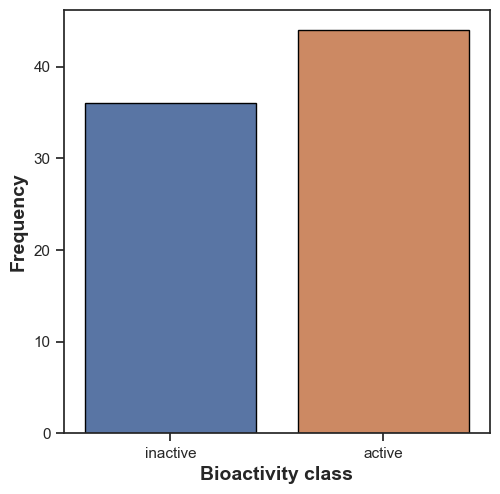

In [59]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='class', data=df_2class, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

### **Scatter plot of MW versus LogP**

It can be seen that the 2 bioactivity classes are spanning similar chemical spaces (with same outliers) as evident by the scatter plot of MW vs LogP below.

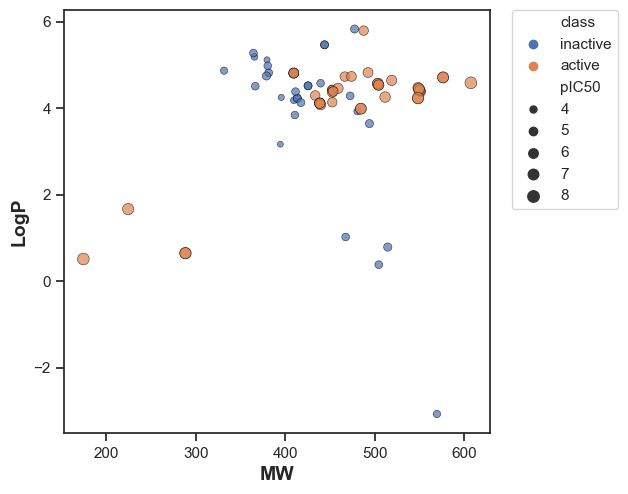

In [60]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

### **Box plots**

#### **pIC50 value**

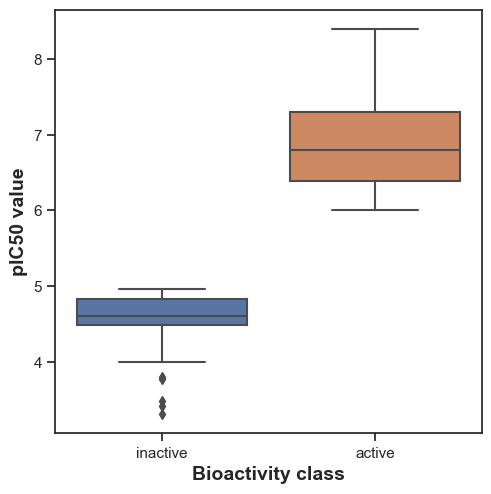

In [61]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'pIC50', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

#### Can clearly see in above box plot that the inactive class is inactive majorly due to the reason of its low pIC50 that is higher concentration of that compound is reqd to inhibit the protein, making the drug less effective

### __Mann-Whitney U Test__

This test tests whether there is a significant difference between 2 independent samples (active and inactive class here). It is a non-parametric counterpart to the t-test for independent samples. 

But there is an important difference between the 2 tests, the t-test tests whether the mean values of the 2 samples differ significantly while mann whitney u test tests whether there is a significant rank sum difference. 

Null Hypothesis (H0) in MWU test: in the 2 samples, the rank sums do not differ significantly.

If p value is greater than the significance level of 0.05, null hypotheses cannot be rejected based on the sample

**Statistical analysis | Mann-Whitney U Test**

In [62]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'class']
  df = df_2class[selection]
  active = df[df['class'] == 'active']
  active = active[descriptor]

  selection = [descriptor, 'class']
  df = df_2class[selection]
  inactive = df[df['class'] == 'inactive']
  inactive = inactive[descriptor]
  
# compare samples
  stat, p = mannwhitneyu(active, inactive)
  print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  print(p)
  print(len(active))
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'
  
  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = '../../datasets/CFTR/mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [63]:
mannwhitney('pIC50')



Statistics=1584.000, p=0.000
1.9038596194797942e-14
44


,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,1584.0,1.903860e-14,0.05,Different distribution (reject H0)


#### **MW**

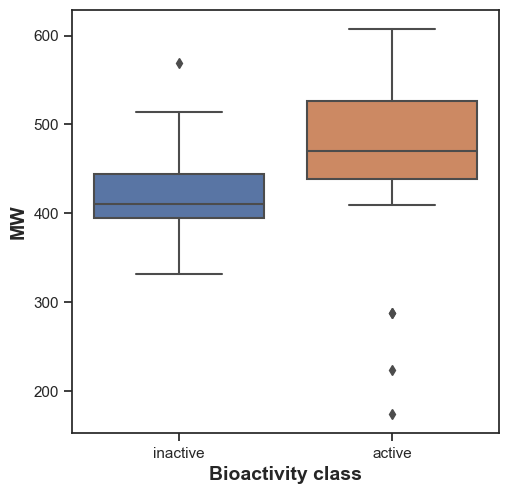

In [64]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'MW', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

In [65]:
mannwhitney('MW')

Statistics=1184.500, p=0.000
0.00014724151222882508
44


,Descriptor,Statistics,p,alpha,Interpretation
0,MW,1184.5,0.000147,0.05,Different distribution (reject H0)


#### **LogP**

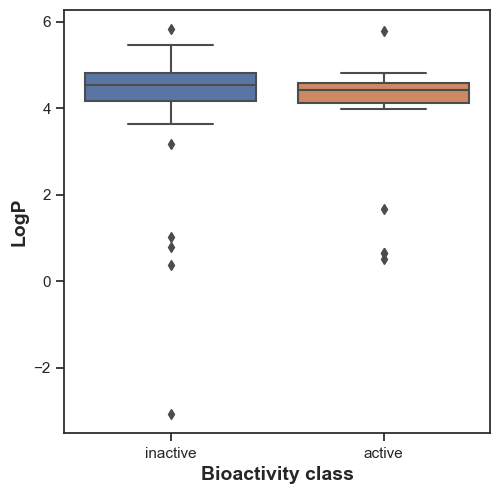

In [66]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'LogP', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [67]:
mannwhitney('LogP')

Statistics=624.500, p=0.106
0.10586855289423057
44


,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,624.5,0.105869,0.05,Same distribution (fail to reject H0)


#### **NumHDonors**

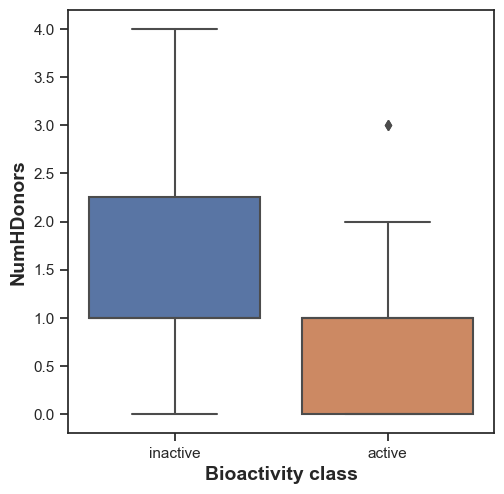

In [68]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHDonors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [69]:
mannwhitney('NumHDonors')

Statistics=398.000, p=0.000
3.928651011257105e-05
44


,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,398.0,0.000039,0.05,Different distribution (reject H0)


#### **NumHAcceptors**

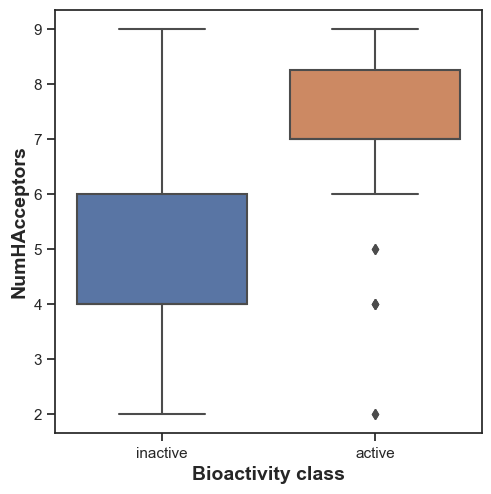

In [70]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHAcceptors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [71]:
mannwhitney('NumHAcceptors')

Statistics=1310.000, p=0.000
2.88524783081915e-07
44


,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,1310.0,2.885248e-07,0.05,Different distribution (reject H0)


#### **Interpretation of Statistical Results**

##### **Box Plots**

###### **pIC50 values**

Taking a look at pIC50 values, the **actives** and **inactives** displayed ***statistically significant difference***, which is to be expected since threshold values (``IC50 < 1,000 nM = Actives while IC50 > 10,000 nM = Inactives``, corresponding to ``pIC50 > 6 = Actives and pIC50 < 5 = Inactives``) were used to define actives and inactives.

###### **Lipinski's descriptors**

3 out of the 4 Lipinski's descriptors (Mol_wt, No. of H acceptors, No. of H donors, Octanol-water partition coefficient (LogP)) exhibited ***statistically significant difference*** between the **actives** and **inactives** based on Mann-Whitney U Test, which is allowed significant difference of descriptors since violation of at max 1 condition is allowed in Lipsinki's Rule of five.